# Tutorial Opty

This solves the simple pendulum swing up problem presented here:
http://hmc.csuohio.edu/resources/human-motion-seminar-jan-23-2014.
A simple pendulum is controlled by a torque at its joint. The goal is to
swing the pendulum from its rest equilibrium to a target angle by minimizing
the energy used to do so.

In [16]:
import sympy
sympy.__version__

'1.7.1'

## Import statement

In [17]:
from collections import OrderedDict

import numpy as np
import sympy as sym
from opty.direct_collocation import Problem
from opty.utils import building_docs
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Implementation

1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500
1500 500 500

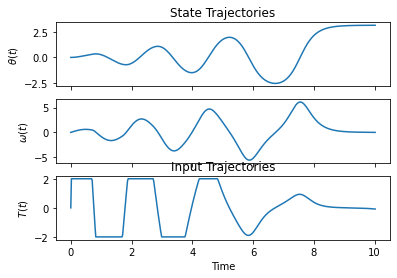

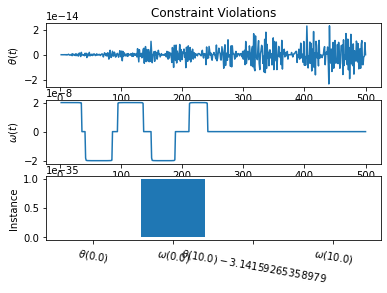

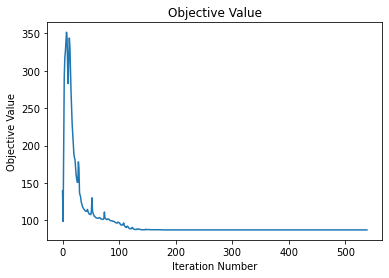

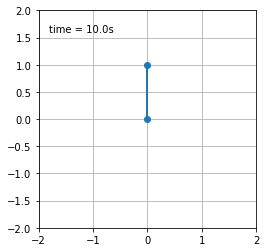

In [26]:
target_angle = np.pi
duration = 10.0
num_nodes = 500
num_nodes_control = num_nodes - 1 # ADDED
save_animation = True
gamma = 1.5 # ADDED
timesteps = np.linspace(0, duration, num_nodes) # ADDED
n_states = 2 # ADDED

interval_value = duration / (num_nodes - 1)

# Symbolic equations of motion
I, m, g, d, t = sym.symbols('I, m, g, d, t')
theta, omega, T = sym.symbols('theta, omega, T', cls=sym.Function)

state_symbols = (theta(t), omega(t))
constant_symbols = (I, m, g, d)
specified_symbols = (T(t),)

eom = sym.Matrix([theta(t).diff() - omega(t),
                  I * omega(t).diff() + m * g * d * sym.sin(theta(t)) - T(t)])

# Specify the known system parameters.
par_map = OrderedDict()
par_map[I] = 1.0
par_map[m] = 1.0
par_map[g] = 9.81
par_map[d] = 1.0

# Specify the objective function and it's gradient.


def obj(free):
    """Minimize the sum of the squares of the control torque."""
    T = free[2 * num_nodes:] 
    # Cost = interval_value * np.sum(T**2) # ORIGINAL
    Cost = interval_value * np.sum((gamma**timesteps) * T**2) # ORIGINAL
    return Cost

def obj_grad(free):
    grad = np.zeros_like(free)
    #grad[2 * num_nodes:] = 2.0 * interval_value * free[2 * num_nodes:] # ORIGINAL
    grad[2 * num_nodes:] = 2.0 * interval_value * free[2 * num_nodes:] * gamma ** timesteps # ADDED
    return grad

# Specify the symbolic instance constraints, i.e. initial and end
# conditions.
instance_constraints = (theta(0.0),
                        omega(0.0),
                        theta(duration) - target_angle,
                        omega(duration))

# Create an optimization problem.
prob = Problem(obj, obj_grad, eom, state_symbols, num_nodes, interval_value,
               known_parameter_map=par_map,
               instance_constraints=instance_constraints,
               bounds={T(t): (-2.0, 2.0)})

# Use a random positive initial guess.
initial_guess = np.random.randn(prob.num_free)

# Find the optimal solution.
solution, info = prob.solve(initial_guess)

# Make some plots
prob.plot_trajectories(solution)
prob.plot_constraint_violations(solution)
prob.plot_objective_value()

# Display animation
if not building_docs():
    time = np.linspace(0.0, duration, num=num_nodes)
    angle = solution[:num_nodes]

    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-2, 2),
                         ylim=(-2, 2))
    ax.grid()

    line, = ax.plot([], [], 'o-', lw=2)
    time_template = 'time = {:0.1f}s'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def init():
        line.set_data([], [])
        time_text.set_text('')
        return line, time_text

    def animate(i):
        x = [0, par_map[d] * np.sin(angle[i])]
        y = [0, -par_map[d] * np.cos(angle[i])]

        line.set_data(x, y)
        time_text.set_text(time_template.format(i * interval_value))
        return line, time_text

    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(time)),
                                  interval=25, blit=True, init_func=init)

    if save_animation:
        ani.save('pendulum_swing_up.mp4', writer='ffmpeg',
                 fps=1 / interval_value)

plt.show()